<a href="https://colab.research.google.com/github/sanjanasrimanjunath/Sustainable_Agriculture/blob/main/PrecissionFertiliserAndPesticide_RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
atharvaingle_crop_recommendation_dataset_path = kagglehub.dataset_download('atharvaingle/crop-recommendation-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

# Load Dataset

In [ ]:
# load the dataset
data=pd.read_csv(f'{atharvaingle_crop_recommendation_dataset_path}/Crop_recommendation.csv')

In [ ]:
# show the top 5 rows of dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# checking the shape of dataset
data.shape

(2200, 8)

In [ ]:
# checking the columns
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# checking the missing values in dataset
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
# checking the duplicated values in dataset
data.duplicated().sum()

np.int64(0)

In [ ]:
# statistical summary of dataset numerical columns
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# checking the unique values of label
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
# checking the values of each labels
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


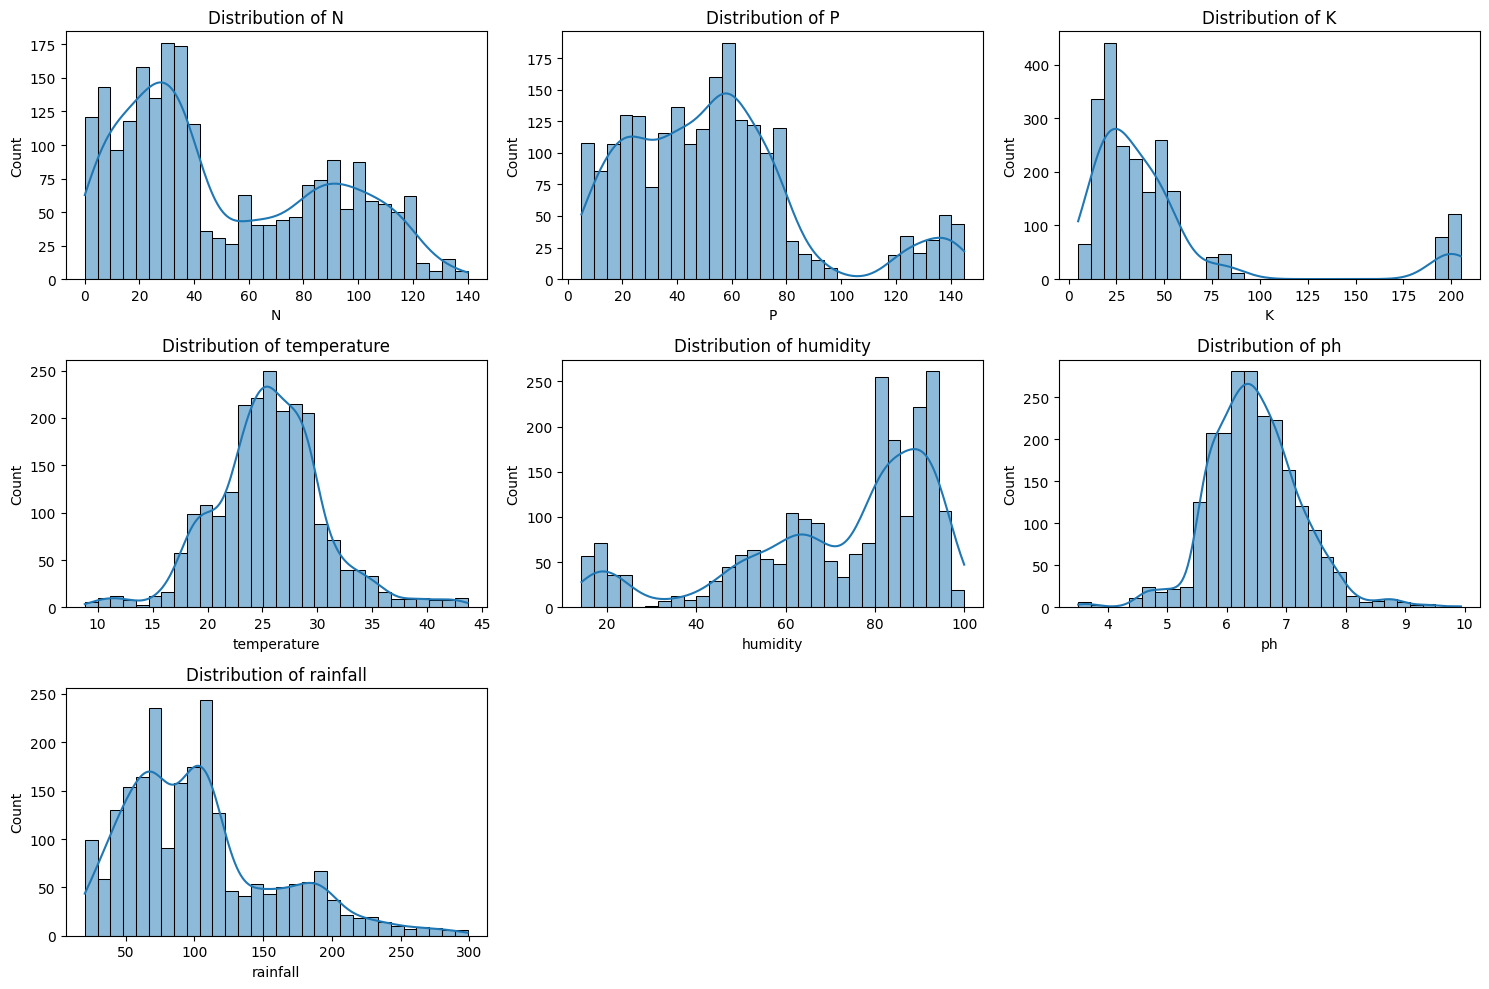

In [ ]:
# Distribution of numerical features
num_features = ['N','P','K','temperature','humidity','ph','rainfall']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

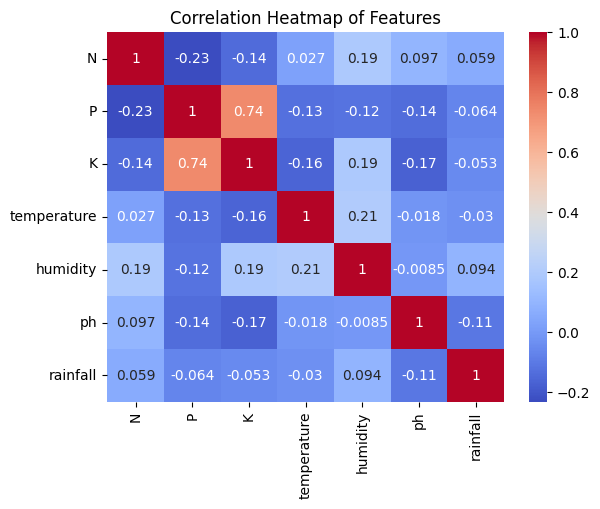

In [ ]:
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

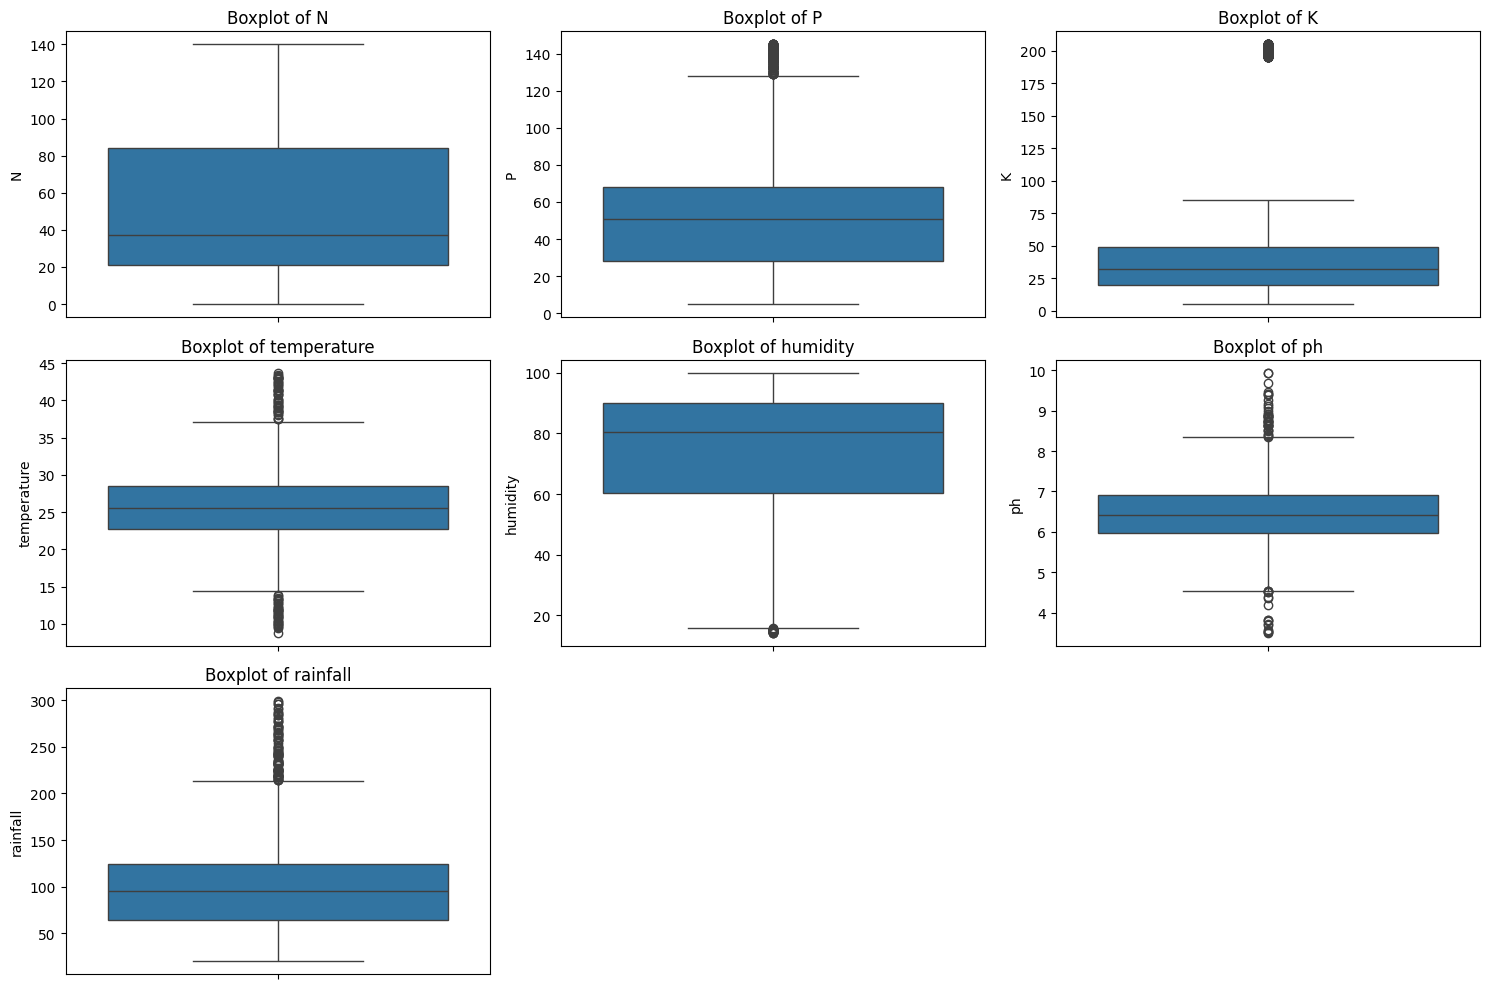

In [ ]:
#  Boxplots to detect outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

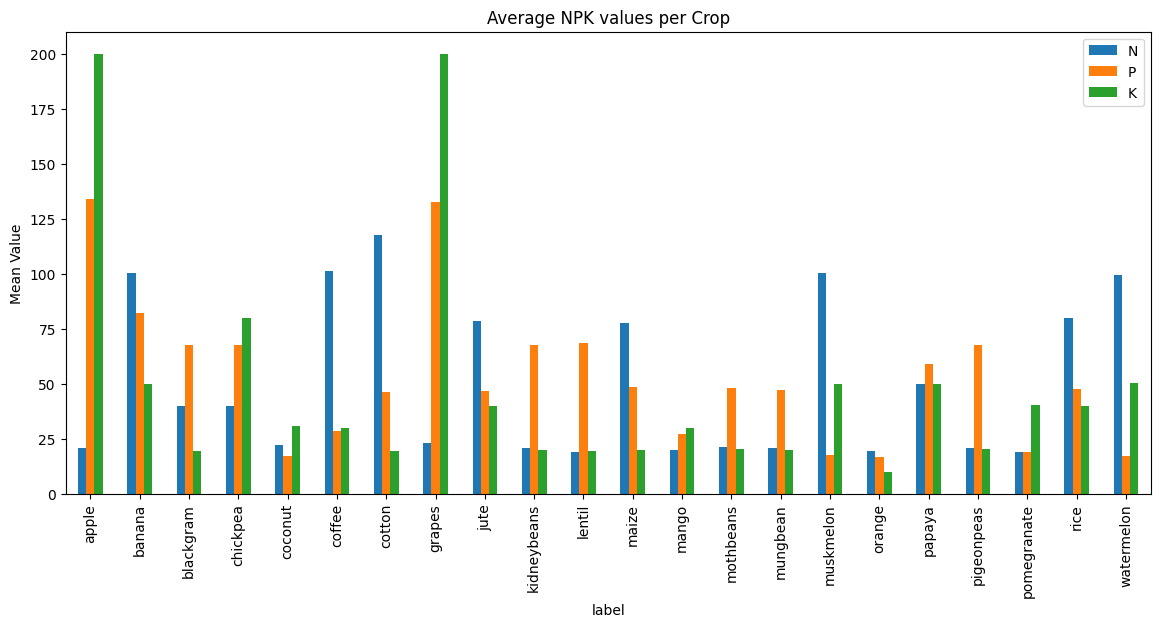

In [ ]:
#  Average feature values by crop

plt.figure(figsize=(12,6))
avg_values = data.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.show()

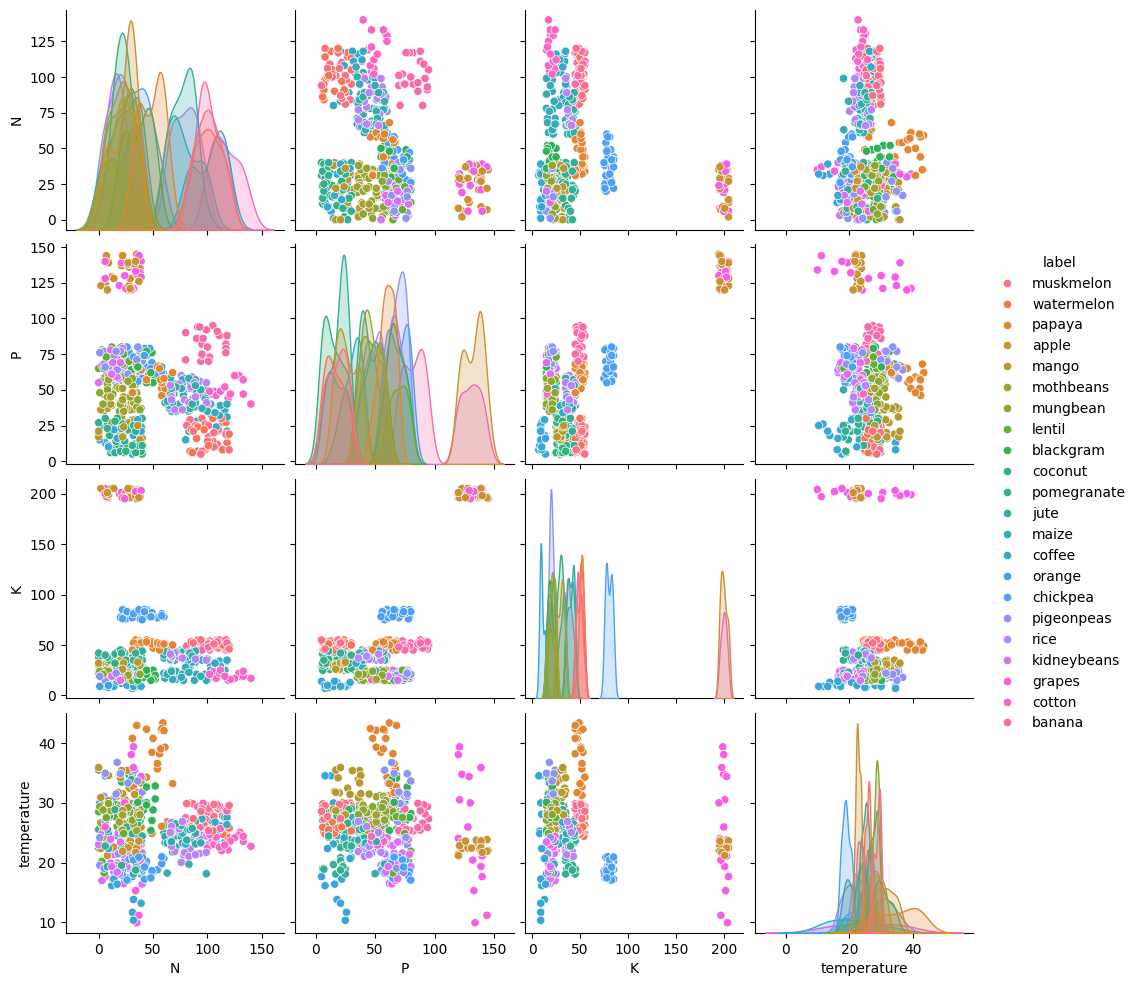

In [ ]:
#  Pairplot (sample for visualization due to large dataset)
sample_df = data.sample(500, random_state=42)
sns.pairplot(sample_df, hue="label", vars=['N','P','K','temperature'])
plt.show()

Adding new columns for our requirement




In [ ]:
def feature_engineer(data):
    data['NPK'] = (data['N'] + data['P'] + data['K']) / 3
    data['THI'] = data['temperature'] * data['humidity'] / 100
    data['rainfall_level'] = pd.cut(data['rainfall'],
                              bins=[0, 50, 100, 200, 300],
                              labels=['Low', 'Medium', 'High', 'Very High'])
    def ph_category(p):
        if p < 5.5:
            return 'Acidic'
        elif p <= 7.5:
            return 'Neutral'
        else:
            return 'Alkaline'

    data['ph_category'] = data['ph'].apply(ph_category)
    data['temp_rain_interaction'] = data['temperature'] * data['rainfall']
    data['ph_rain_interaction'] = data['ph'] * data['rainfall']

    return data

In [ ]:
data_fe = feature_engineer(data)
data_fe.head()

,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain_interaction,ph_rain_interaction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,58.333333,17.121963,Very High,Neutral,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,61.333333,17.485957,Very High,Neutral,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,53.000000,18.937446,Very High,Alkaline,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,49.666667,21.234829,Very High,Neutral,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,54.000000,16.427204,Very High,Alkaline,5288.545993,2004.132110


In [ ]:
# encoding of string columns
ec=LabelEncoder()
data['label']=ec.fit_transform(data['label'])
data['rainfall_level']=ec.fit_transform(data['rainfall_level'])
data['ph_category']=ec.fit_transform(data['ph_category'])

In [ ]:
# feature engineering
X=data.drop('label',axis=1)
y=data['label']

In [ ]:
# model selection devide the data in traning and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# train the RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.score(X_train,y_train)

0.9982954545454545

In [ ]:
y_pred_rfc=rfc.predict(X_test)

In [ ]:
print('accuracy score:',accuracy_score(y_test,y_pred_rfc))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_rfc))
print('classification report:',classification_report(y_test,y_pred_rfc))

accuracy score: 0.9840909090909091
mean_squared_error: 1.2363636363636363
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      0.96      0.92        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      0.95      0.97        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00     

In [ ]:
# train the Machine leaning Support Vector machine model
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svm=svm.predict(X_test)

In [ ]:
print('accuracy score:',accuracy_score(y_test,y_pred_svm))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_svm))
print('classification report:',classification_report(y_test,y_pred_svm))

accuracy score: 0.9659090909090909
mean_squared_error: 3.8954545454545455
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.86      0.95      0.90        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       0.95      1.00      0.97        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00     

In [ ]:
# train the ML XGBclassifier model
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(X_test)

In [ ]:
print('accuracy score:',accuracy_score(y_test,y_pred_xgb))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_xgb))
print('classification report:',classification_report(y_test,y_pred_xgb))

accuracy score: 0.9886363636363636
mean_squared_error: 1.0977272727272727
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00     

**Reasoning**:
Define a function to recommend fertilizer based on N, P, and K levels using conditional logic according to a predefined mapping.



In [ ]:
def recommend_fertilizer(N, P, K):
    """
    Recommends fertilizer based on N, P, and K levels.

    Args:
        N: Nitrogen level.
        P: Phosphorus level.
        K: Potassium level.

    Returns:
        A tuple containing the recommended fertilizer, eco-friendly alternative, and dosage.
    """
    if N > 80 and P > 40 and K > 40:
        return "Urea", "Compost", "100-150 kg/acre"
    elif N > 60 and P > 30 and K > 30:
        return "DAP", "Manure", "80-120 kg/acre"
    elif N > 40 and P > 20 and K > 20:
        return "SSP", "Vermicompost", "60-100 kg/acre"
    else:
        return "General Purpose Fertilizer", "Organic Fertilizer Blend", "50-80 kg/acre"


In [ ]:
data[['recommended_fertilizer', 'eco_friendly_alternative', 'dosage']] = data.apply(lambda row: recommend_fertilizer(row['N'], row['P'], row['K']), axis=1, result_type='expand')
display(data.head())

,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain_interaction,ph_rain_interaction,recommended_fertilizer,eco_friendly_alternative,dosage
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,58.333333,17.121963,3,2,4237.241986,1319.686807,Urea,Compost,100-150 kg/acre
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,61.333333,17.485957,3,2,4934.395694,1595.223513,Urea,Compost,100-150 kg/acre
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,53.000000,18.937446,3,1,6072.354751,2069.534380,SSP,Vermicompost,60-100 kg/acre
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,49.666667,21.234829,3,2,6433.734530,1695.288324,DAP,Manure,80-120 kg/acre
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,54.000000,16.427204,3,1,5288.545993,2004.132110,DAP,Manure,80-120 kg/acre


In [ ]:
fertilizer_distribution = data.groupby('label')['recommended_fertilizer'].value_counts().unstack(fill_value=0)
display(fertilizer_distribution)

recommended_fertilizer,DAP,General Purpose Fertilizer,SSP,Urea
label,,,,
0,0,100,0,0
1,3,0,0,97
2,0,81,19,0
3,0,54,46,0
4,0,100,0,0
5,23,15,62,0
6,0,64,36,0
7,0,100,0,0
8,86,0,4,10


In [ ]:
y_pred_xgb = xgb.predict(X_test)


ec = LabelEncoder()
data['label_encoded'] = ec.fit_transform(data['label'])


predicted_crop_labels = ec.inverse_transform(y_pred_xgb)


predicted_fertilizer_recommendations = data_fe.loc[:, ['label', 'recommended_fertilizer', 'eco_friendly_alternative', 'dosage']].drop_duplicates(subset=['label'])


label_mapping = data.drop_duplicates(subset=['label']).set_index('label_encoded')['label'].to_dict()
predicted_fertilizer_recommendations['label_encoded'] = predicted_fertilizer_recommendations['label'].map({v: k for k, v in label_mapping.items()})


output_df = pd.DataFrame({'predicted_crop_encoded': y_pred_xgb})

output_df = output_df.merge(predicted_fertilizer_recommendations, left_on='predicted_crop_encoded', right_on='label_encoded', how='left')

output_df = output_df.drop(['predicted_crop_encoded', 'label_encoded'], axis=1)


display(output_df.head())

,label,recommended_fertilizer,eco_friendly_alternative,dosage
0,15,General Purpose Fertilizer,Organic Fertilizer Blend,50-80 kg/acre
1,21,SSP,Vermicompost,60-100 kg/acre
2,17,DAP,Manure,80-120 kg/acre
3,17,DAP,Manure,80-120 kg/acre
4,0,General Purpose Fertilizer,Organic Fertilizer Blend,50-80 kg/acre


In [ ]:
def map_pest_risk(crop_type, temperature, humidity, rainfall):
    """
    Maps pest risk level and recommends actions based on crop type, temperature, humidity, and rainfall.

    Args:
        crop_type: The type of crop (string).
        temperature: The temperature (float).
        humidity: The humidity (float).
        rainfall: The rainfall (float).

    Returns:
        A tuple containing the risk level (string) and recommended action (string).
    """
    risk_level = "Low"
    recommended_action = "Routine monitoring"

    if temperature > 30 and humidity > 70:
        if crop_type in ['rice', 'maize', 'jute']:
            risk_level = "High"
            recommended_action = "Immediate pest control measures"
        elif crop_type in ['cotton', 'sugarcane']:
             risk_level = "High"
             recommended_action = "Immediate pest control measures"
        else:
            risk_level = "Medium"
            recommended_action = "Increased monitoring and preventative measures"
    elif temperature > 25 and humidity > 60:
        if crop_type in ['coffee', 'tea', 'rubber']:
            risk_level = "High"
            recommended_action = "Immediate pest control measures"
        else:
            risk_level = "Medium"
            recommended_action = "Increased monitoring and preventative measures"
    elif rainfall > 150:
        if crop_type in ['rice', 'jute']:
            risk_level = "High"
            recommended_action = "Immediate pest control measures"
        elif crop_type in ['coconut', 'arecanut']:
            risk_level = "High"
            recommended_action = "Immediate pest control measures"
        else:
            risk_level = "Medium"
            recommended_action = "Increased monitoring and preventative measures"
    elif temperature < 10 or temperature > 40 or humidity < 30:
        risk_level = "Medium"
        recommended_action = "Monitor for stress-related pests/diseases"

    return risk_level, recommended_action


In [ ]:
data_fe[['pest_risk_level', 'pest_recommended_action']] = data_fe.apply(lambda row: map_pest_risk(row['label'], row['temperature'], row['humidity'], row['rainfall']), axis=1, result_type='expand')
display(data_fe.head())

,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain_interaction,ph_rain_interaction,recommended_fertilizer,eco_friendly_alternative,dosage,label_encoded,pest_risk_level,pest_recommended_action
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,58.333333,17.121963,3,2,4237.241986,1319.686807,Urea,Compost,100-150 kg/acre,20,Medium,Increased monitoring and preventative measures
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,61.333333,17.485957,3,2,4934.395694,1595.223513,Urea,Compost,100-150 kg/acre,20,Medium,Increased monitoring and preventative measures
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,53.000000,18.937446,3,1,6072.354751,2069.534380,SSP,Vermicompost,60-100 kg/acre,20,Medium,Increased monitoring and preventative measures
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,49.666667,21.234829,3,2,6433.734530,1695.288324,DAP,Manure,80-120 kg/acre,20,Medium,Increased monitoring and preventative measures
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,54.000000,16.427204,3,1,5288.545993,2004.132110,DAP,Manure,80-120 kg/acre,20,Medium,Increased monitoring and preventative measures


**Reasoning**:
Calculate and display the value counts of the 'pest_risk_level' column.



In [ ]:
# 1. Calculate the value counts of the pest_risk_level column
pest_risk_counts = data_fe['pest_risk_level'].value_counts()
display("Overall Pest Risk Level Distribution:", pest_risk_counts)

# 2. Group by label and calculate value counts of pest_risk_level
pest_risk_by_crop = data_fe.groupby('label')['pest_risk_level'].value_counts().unstack(fill_value=0)
display("Pest Risk Level Distribution by Crop:", pest_risk_by_crop)

# 3. Group by rainfall_level and calculate value counts of pest_risk_level
pest_risk_by_rainfall = data_fe.groupby('rainfall_level')['pest_risk_level'].value_counts().unstack(fill_value=0)
display("Pest Risk Level Distribution by Rainfall Level:", pest_risk_by_rainfall)

# 3. Group by ph_category and calculate value counts of pest_risk_level
pest_risk_by_ph = data_fe.groupby('ph_category')['pest_risk_level'].value_counts().unstack(fill_value=0)
display("Pest Risk Level Distribution by pH Category:", pest_risk_by_ph)

'Overall Pest Risk Level Distribution:'

,count
pest_risk_level,
Medium,1390
Low,810


'Pest Risk Level Distribution by Crop:'

pest_risk_level,Low,Medium
label,,
0,100,0
1,0,100
2,0,100
3,0,100
4,0,100
5,38,62
6,75,25
7,49,51
8,0,100


'Pest Risk Level Distribution by Rainfall Level:'

pest_risk_level,Low,Medium
rainfall_level,,
0,360,521
1,92,239
2,358,498
3,0,132


'Pest Risk Level Distribution by pH Category:'

pest_risk_level,Low,Medium
ph_category,,
0,79,38
1,75,110
2,656,1242


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas

# load the dataset
data=pd.read_csv(f'{atharvaingle_crop_recommendation_dataset_path}/Crop_recommendation.csv')

ec = LabelEncoder()
data['label_encoded'] = ec.fit_transform(data['label'])

y_pred_xgb = xgb.predict(X_test)
predicted_crop_labels = ec.inverse_transform(y_pred_xgb)


predicted_fertilizer_recommendations = data_fe.loc[:, ['label', 'recommended_fertilizer', 'eco_friendly_alternative', 'dosage']].drop_duplicates(subset=['label'])


label_mapping = data.drop_duplicates(subset=['label']).set_index('label_encoded')['label'].to_dict()
predicted_fertilizer_recommendations['label_encoded'] = predicted_fertilizer_recommendations['label'].map({v: k for k, v in label_mapping.items()})


output_df = pd.DataFrame({'predicted_crop_encoded': y_pred_xgb})

output_df = output_df.merge(predicted_fertilizer_recommendations, left_on='predicted_crop_encoded', right_on='label_encoded', how='left')

output_df = output_df.drop(['predicted_crop_encoded', 'label_encoded'], axis=1)

integrated_df = output_df.merge(data_fe[['label', 'pest_risk_level', 'pest_recommended_action']].drop_duplicates(subset=['label']), on='label', how='left')

display(integrated_df.head())


def get_recommendation(N, P, K, ph, temperature, humidity, rainfall, crop=None):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    if crop is None:

        predicted_crop = "Unknown Crop" # Placeholder

    else:
        predicted_crop = crop   # use given crop directly

    # Fertilizer suggestion
    fert = {
        "Wheat": {"Chemical": "Urea: 25kg/acre, SSP: 20kg/acre",
                  "EcoFriendly": "Use green manure before sowing"},
        "Rice": {"Chemical": "Urea: 30kg/acre, DAP: 10kg/acre",
                 "EcoFriendly": "Apply compost/vermicompost to reduce nitrogen loss"},
        "Maize": {"Chemical": "NPK 20:10:10 @ 40kg/acre",
                  "EcoFriendly": "Add farmyard manure for soil health"},
         "Unknown Crop": {"Chemical": "General purpose fertilizer",
                           "EcoFriendly": "Consult local agricultural extension for specific recommendations"}
    }

    # Pesticide advice
    pest = {
        "Wheat": {"Level": "Low", "Advice": "Regular field monitoring, use neem spray if pests appear"},
        "Rice": {"Level": "Medium", "Advice": "Use neem oil spray every 10 days; avoid excessive pesticides"},
        "Maize": {"Level": "High", "Advice": "Use pheromone traps to control stem borers"},
        "Unknown Crop": {"Level": "Unknown", "Advice": "Monitor closely and consult with an expert if issues arise"}
    }

    return {
        "Crop": str(predicted_crop),
        "Fertilizer Suggestion": fert.get(predicted_crop, {"Chemical": "N/A", "EcoFriendly": "N/A"}),
        "Pest Risk": pest.get(predicted_crop, {"Level": "Unknown", "Advice": "N/A"}),
        "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
    }

,label,recommended_fertilizer,eco_friendly_alternative,dosage,pest_risk_level,pest_recommended_action
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import json
import numpy as np

def convert_numpy(obj):
    """Convert numpy types to Python native types."""
    if isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError(f"Type {type(obj)} not serializable")

# Example usage
example = get_recommendation(N=20, P=15, K=30, ph=6.5,
                             temperature=30, humidity=80, rainfall=200,
                             crop="Rice")

print(json.dumps(example, indent=4, default=convert_numpy))




{
    "Crop": "Rice",
    "Fertilizer Suggestion": {
        "Chemical": "Urea: 30kg/acre, DAP: 10kg/acre",
        "EcoFriendly": "Apply compost/vermicompost to reduce nitrogen loss"
    },
    "Pest Risk": {
        "Level": "Medium",
        "Advice": "Use neem oil spray every 10 days; avoid excessive pesticides"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}


In [ ]:
example1 = get_recommendation(N=40, P=20, K=30, ph=6.8,
                              temperature=22, humidity=60, rainfall=120,
                              crop="Wheat")

print(json.dumps(example1, indent=4, default=convert_numpy))


{
    "Crop": "Wheat",
    "Fertilizer Suggestion": {
        "Chemical": "Urea: 25kg/acre, SSP: 20kg/acre",
        "EcoFriendly": "Use green manure before sowing"
    },
    "Pest Risk": {
        "Level": "Low",
        "Advice": "Regular field monitoring, use neem spray if pests appear"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}


In [ ]:
example2 = get_recommendation(N=25, P=15, K=35, ph=5.8,
                              temperature=28, humidity=75, rainfall=180,
                              crop="Maize")

print(json.dumps(example2, indent=4, default=convert_numpy))


{
    "Crop": "Maize",
    "Fertilizer Suggestion": {
        "Chemical": "NPK 20:10:10 @ 40kg/acre",
        "EcoFriendly": "Add farmyard manure for soil health"
    },
    "Pest Risk": {
        "Level": "High",
        "Advice": "Use pheromone traps to control stem borers"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}


In [ ]:
example3 = get_recommendation(N=15, P=10, K=20, ph=7.2,
                              temperature=32, humidity=40, rainfall=60,
                              crop="Cotton")

print(json.dumps(example3, indent=4, default=convert_numpy))


{
    "Crop": "Cotton",
    "Fertilizer Suggestion": {
        "Chemical": "N/A",
        "EcoFriendly": "N/A"
    },
    "Pest Risk": {
        "Level": "Unknown",
        "Advice": "N/A"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}


In [ ]:
example4 = get_recommendation(N=50, P=25, K=40, ph=6.5,
                              temperature=30, humidity=70, rainfall=300,
                              crop="Mango")

print(json.dumps(example4, indent=4, default=convert_numpy))


{
    "Crop": "Mango",
    "Fertilizer Suggestion": {
        "Chemical": "N/A",
        "EcoFriendly": "N/A"
    },
    "Pest Risk": {
        "Level": "Unknown",
        "Advice": "N/A"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}


In [ ]:
example5 = get_recommendation(N=10, P=20, K=15, ph=6.2,
                              temperature=27, humidity=65, rainfall=150,
                              crop="Soybean")

print(json.dumps(example5, indent=4, default=convert_numpy))

{
    "Crop": "Soybean",
    "Fertilizer Suggestion": {
        "Chemical": "N/A",
        "EcoFriendly": "N/A"
    },
    "Pest Risk": {
        "Level": "Unknown",
        "Advice": "N/A"
    },
    "Sustainability Tip": "Rotate with legumes next season to restore soil nitrogen"
}
